# 03. Сравнение моделей машинного обучения
**Цель**: Сравнение алгоритмов машинного обучения для прогнозирования спроса

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
from src.models.baseline_models import BaselineModels
from src.models.lgmb_model import LGBMModel
from config.settings import DATA_PATH, REPORTS_PATH

# Настройки отображения
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")
pd.set_option("display.float_format", "{:.3f}".format)

In [2]:
# 1. Загрузка подготовленных данных
print("\n1. Загрузка данных...")
df = pd.read_csv(DATA_PATH / "processed/final_dataset.csv")
print(f"Загружено: {len(df)} записей, {df.shape[1]} признаков")


1. Загрузка данных...
Загружено: 785695 записей, 57 признаков


In [3]:
# 2. Анализ базовых моделей
print("\n2. Анализ baseline моделей...")
baseline_analyzer = BaselineModels()
baseline_results = baseline_analyzer.run_complete_analysis()


2. Анализ baseline моделей...
Загрузка данных для анализа базовых моделей...
Разделение данных на обучающую и тестовую выборки...
Магазины: все 1115 магазинов в обоих наборах
Диапазон train: 2013-1-1 до 2014-9-37
Диапазон test: 2014-9-37 до 2015-5-22
Обучение и оценка базовых моделей...
Начало обучения базовых моделей
Обучающая выборка: 558787 samples, 56 features
Тестовая выборка: 226908 samples

--- Обучение модели: LinearRegression ---
Модель LinearRegression обучена за 1.10 секунд
Метрики - MAE: 922.21, RMSE: 1344.59, MAPE: 14.50%

--- Обучение модели: RandomForest ---
Модель RandomForest обучена за 114.17 секунд
Метрики - MAE: 707.19, RMSE: 1042.68, MAPE: 10.59%

--- Обучение модели: MeanBaseline ---


C:\Users\lunar\PycharmProjects\demand_forecasting\src\models\base_model.py:114: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(y_pred, residuals, 1)


Модель MeanBaseline обучена за 0.01 секунд
Метрики - MAE: 2286.35, RMSE: 3160.32, MAPE: 36.76%
Результаты сохранены:
- Детальные метрики: C:\Users\lunar\PycharmProjects\demand_forecasting\reports\baseline_models_results.csv
- Сводный отчет: C:\Users\lunar\PycharmProjects\demand_forecasting\reports\baseline_models_summary.json
СВОДНЫЙ ОТЧЕТ ПО БАЗОВЫМ МОДЕЛЯМ
Лучшая модель: RandomForest (MAPE: 10.59%)
Худшая модель: MeanBaseline (MAPE: 36.76%)
Общее время обучения: 115.28 секунд

Детальные результаты
- LinearRegression: MAPE:14.50%, MAE=922.21, RMSE=1344.59, Время=1.10c
- RandomForest: MAPE:10.59%, MAE=707.19, RMSE=1042.68, Время=114.17c
- MeanBaseline: MAPE:36.76%, MAE=2286.35, RMSE=3160.32, Время=0.01c
Нет успешно обученных моделей для анализа


In [4]:
# 3. Обучение LightGBM модели
print("\n3. Обучение LightGBM модели...")
lgbm_model = LGBMModel()
lgbm_metrics, lgbm_predictions = lgbm_model.run_complete_training()


3. Обучение LightGBM модели...


[I 2025-12-03 20:04:49,220] A new study created in memory with name: no-name-687fc4d8-484c-484f-bbee-3742f656a301


Магазины: все 1115 магазинов в обоих наборах
Диапазон train: 2013-1-1 до 2014-12-49
Диапазон test: 2014-12-49 до 2015-5-22


[I 2025-12-03 20:05:25,229] Trial 0 finished with value: 10.817568274128885 and parameters: {'lambda_l1': 1.8118125320004525e-05, 'lambda_l2': 1.8630960031298465, 'num_leaves': 204, 'max_depth': 9, 'min_data_in_leaf': 48, 'feature_fraction': 0.6467983561008608, 'bagging_fraction': 0.6174250836504598, 'bagging_freq': 7, 'min_child_samples': 64, 'min_child_weight': 0.014437836359206434, 'learning_rate': 0.010636066512540286, 'max_bin': 501, 'extra_trees': True, 'path_smooth': 0.9091248360355031}. Best is trial 0 with value: 10.817568274128885.
[I 2025-12-03 20:05:36,635] Trial 1 finished with value: 9.670014102353885 and parameters: {'lambda_l1': 3.939402261362697e-07, 'lambda_l2': 4.4319427891510175e-06, 'num_leaves': 164, 'max_depth': 8, 'min_data_in_leaf': 72, 'feature_fraction': 0.7835558684167139, 'bagging_fraction': 0.6418481581956126, 'bagging_freq': 3, 'min_child_samples': 43, 'min_child_weight': 9.275538076980542e-05, 'learning_rate': 0.10508421338691762, 'max_bin': 204, 'extra_

Training until validation scores don't improve for 1000 rounds
[500]	valid_0's mape: 0.10401
[1000]	valid_0's mape: 0.1023
[1500]	valid_0's mape: 0.101607
[2000]	valid_0's mape: 0.101247
[2500]	valid_0's mape: 0.100736
[3000]	valid_0's mape: 0.100461
[3500]	valid_0's mape: 0.100444
[4000]	valid_0's mape: 0.100207
[4500]	valid_0's mape: 0.100114
[5000]	valid_0's mape: 0.0999919
[5500]	valid_0's mape: 0.0999787
[6000]	valid_0's mape: 0.0998922
[6500]	valid_0's mape: 0.0998658
[7000]	valid_0's mape: 0.0998312
[7500]	valid_0's mape: 0.0998333
[8000]	valid_0's mape: 0.0998422
Early stopping, best iteration is:
[7179]	valid_0's mape: 0.0997782


In [6]:
# 4. Сбор результатов
print("\n4. Сбор результатов...")

all_results = []

# Результаты baseline моделей
for model_name in baseline_analyzer.results:
    metrics = baseline_analyzer.results[model_name]
    if "error" not in metrics:
        all_results.append({
            "model": model_name,
            "MAPE": metrics["MAPE"],
            "R2": metrics["R2"],
            "MAE": metrics["MAE"],
            "RMSE": metrics["RMSE"]
        })

# Результаты LightGBM
if lgbm_metrics:
    all_results.append({
        "model": "LightGBM",
        "MAPE": lgbm_metrics["MAPE"],
        "R2": lgbm_metrics["R2"],
        "MAE": lgbm_metrics["MAE"],
        "RMSE": lgbm_metrics["RMSE"]
    })

# Создание DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values("MAPE")

print("\nРезультаты моделей:")
display(results_df)


4. Сбор результатов...

Результаты моделей:


,model,MAPE,R2,MAE,RMSE
3,LightGBM,9.978,0.909,677.266,967.795
1,RandomForest,10.585,0.890,707.194,1042.677
0,LinearRegression,14.498,0.817,922.206,1344.592
2,MeanBaseline,36.755,-0.012,2286.354,3160.324


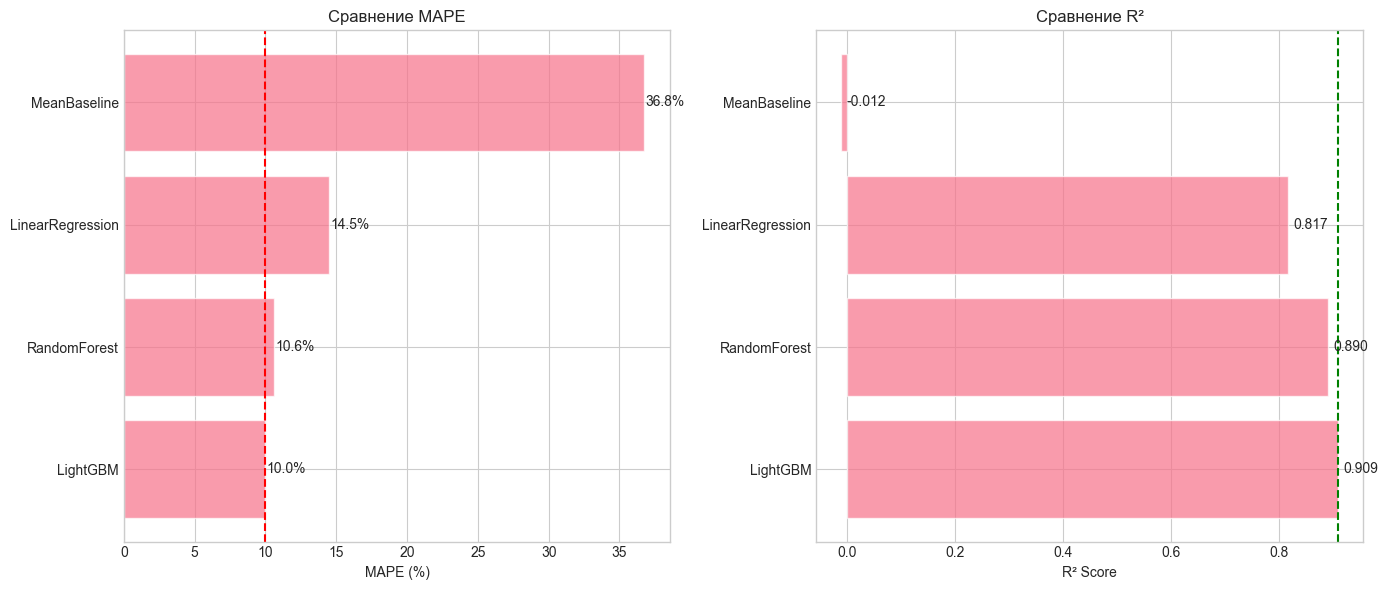

In [7]:
# 5. Визуализация сравнения
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График MAPE
bars1 = axes[0].barh(results_df["model"], results_df["MAPE"], alpha=0.7)
axes[0].set_title("Сравнение MAPE")
axes[0].set_xlabel("MAPE (%)")
axes[0].axvline(results_df["MAPE"].min(), color="red", linestyle="--")

for bar, mape in zip(bars1, results_df["MAPE"]):
    axes[0].text(mape + 0.1, bar.get_y() + bar.get_height()/2,
                f"{mape:.1f}%", va="center")

# График R²
bars2 = axes[1].barh(results_df["model"], results_df["R2"], alpha=0.7)
axes[1].set_title("Сравнение R²")
axes[1].set_xlabel("R² Score")
axes[1].axvline(results_df["R2"].max(), color="green", linestyle="--")

for bar, r2 in zip(bars2, results_df["R2"]):
    axes[1].text(r2 + 0.01, bar.get_y() + bar.get_height()/2,
                f"{r2:.3f}", va="center")

plt.tight_layout()
plt.savefig(REPORTS_PATH / "model_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

In [9]:
# 6. Анализ улучшений
best_baseline = results_df.iloc[0]  # Уже отсортировано по MAPE
best_overall = results_df.iloc[0]

improvement = 0
if best_baseline["model"] != best_overall["model"]:
    baseline_mape = results_df[results_df["model"] == best_baseline["model"]]["MAPE"].values[0]
    best_mape = best_overall["MAPE"]
    improvement = ((baseline_mape - best_mape) / baseline_mape) * 100

In [10]:
# 7. Выводы
print("ВЫВОДЫ")
print("="*60)

print(f"\nЛучшая модель: {best_overall["model"]}")
print(f"MAPE: {best_overall["MAPE"]:.1f}%, R²: {best_overall["R2"]:.3f}")

if improvement > 0:
    print(f"Улучшение против baseline: {improvement:.1f}%")

ВЫВОДЫ

Лучшая модель: LightGBM
MAPE: 10.0%, R²: 0.909


In [11]:
# 8. Сохранение результатов
final_results = {
    "analysis_date": datetime.now().isoformat(),
    "best_model": best_overall["model"],
    "best_mape": float(best_overall["MAPE"]),
    "best_r2": float(best_overall["R2"]),
    "all_results": results_df.to_dict("records")
}

results_path = REPORTS_PATH / "model_results.json"
with open(results_path, "w", encoding="utf-8") as f:
    json.dump(final_results, f, indent=2, ensure_ascii=False)

print(f"\nРезультаты сохранены: {results_path}")


Результаты сохранены: C:\Users\lunar\PycharmProjects\demand_forecasting\reports\model_results.json
